# Math 380 - Linear regression

In this lab we will implement the least-squares linear regression techniques that we discussed in class, and analize how the complexity of the model affects the parameters we find and how well the model fits our data.



---



Suppose that we have a collection of data points

\begin{align}
\{(x_1, y_1), (x_2, y_2), \ldots , (x_k, y_k)\}
\end{align}

where we suspect that there is (an approximate) polynomial relationship between the $x$ and $y$-values.  More precisely, we suspect that there is some polynomial

\begin{align}
f(x,\mathbf{c}) = c_0 + c_1 x+ c_2 x^2 + \cdots + c_m x^m
\end{align}

such that $f(x_j , \mathbf{c}) \approx y_j$ for all $j$.   Here, we are letting $\mathbf{c}$ denote the vector of parameters $\mathbf{c} = (c_0, c_1, \ldots , c_m)$ which we must solve for.

First, we'll import our dependencies:

In [123]:
import numpy as np
from matplotlib import pyplot as plt
import polars as pl

Now we'll create our dataset.  We're going to keep things simple here, and just defined them using a NumPy array (there are much better libraries for storing and manipulating larger datasets).  Here, we have 10 $x$ and $y$-values, which are stored separately in the following arrays:

In [124]:
data = np.array([[ 7.68724979,  2.0094532 ],
       [ 6.16669833, -0.1660153 ],
       [ 3.43162145, -0.50780748],
       [ 1.14409574,  1.63585812],
       [ 8.17792432,  1.78426954],
       [ 2.06924026,  1.70558453],
       [ 6.0722147 , -0.22609358],
       [ 0.29454881,  0.56657205],
       [ 3.58923925, -0.82208022],
       [ 1.39156286,  1.97125708]])

Here, the first row of the data array corresponds to the data point $(x_1, y_1)$, while the second entry is $(x_2, y_2)$, etc.  We'll refer to this dataset as our *training data*.


---

Let's start off by graphing our data points.  Using the library Matplotlib, create a scatterplot of the data set to get an idea for its shape.



In [125]:
x = data[:, 0]
y = data[:, 1]

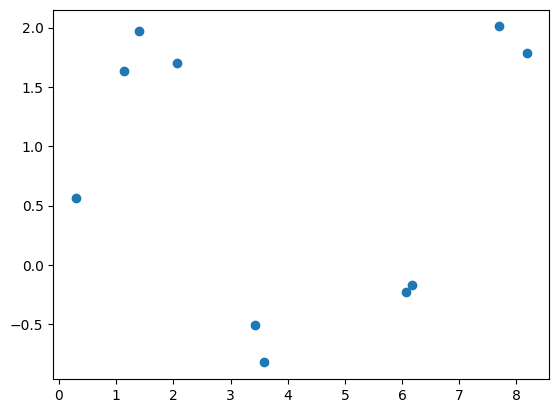

In [126]:
# Create your scatterplot here.
plt.scatter(x, y)
plt.show()

By looking at the data you may guess that a low degree polynomial may model the data points quite well.  Let's start off by trying to model the data using a degree 3 polynomial

\begin{align}
f(x,\mathbf{c}) = c_0 + c_1x + c_2x^2 + c_3 x^3.
\end{align}


Using the dataset above, construct the design matrix $X$ for this cubic polynomial model.

**Hint:** You'll be asked below to repeat this for various higher degree polynomials.  You may want to set this up in a way that will allow you to easily generalize to construct the design matrices of higher degree polynomials.  Perhaps try using list comprehensions in some way.  

In [127]:
# Construct the design matrix here.  It should be a NumPy array.
def design_matrix(x: np.array, degree: int):    
    X = np.column_stack([x**i for i in range(degree + 1)])
    
    return X

In [128]:
X = design_matrix(x, 3)

Now that we have our design matrix $X$, set up and solve the normal equations

\begin{align}
X^TX\mathbf{c} = X^T \mathbf{y}.
\end{align}

Letting $\widehat{\mathbf{c}}$ denote the corresponding least-squares solution to $X \mathbf{c} = \mathbf{y}$, define a function $g(x) = f(x, \widehat{\mathbf{c}})$.  Recall that the least-squares solution $\widehat{\mathbf{c}}$ is the vector that will minimize the quantity

\begin{align}
\|\mathbf{y} - X\mathbf{c}\|^2 = \| \mathbf{y} - f(\mathbf{x},\mathbf{c})\|^2.
\end{align}


In [129]:
# Set up and solve the normal equations here.
def solve(X: np.array, y: np.array) -> np.array:
    return np.linalg.inv(X.T @ X) @ (X.T @ y)
# Taking the least-squares solution you obtain, plug it into f(x,c) to defined a function g(x).

c = solve(X, y)

def g(x: np.array, c: np.array):
    degree = c.shape[0]
    return np.sum(c[:degree] * x[:, None] ** np.arange(degree), axis=1)

The polynomial $g(x)$ should give use the best approximation to our data points by any degree three polynomial.  To see how good our approximation is, plot the graph of the function $g(x)$ along with a scatterplot of the data points on the same axis.

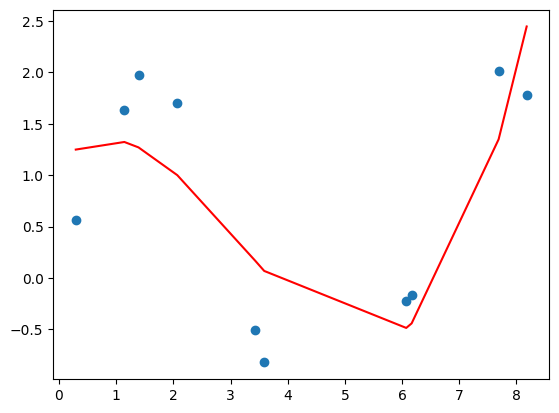

In [130]:
# Plot the graph of the function g(x) along with a scatterplot of the data points.
y_hat = g(x, c)

sorted_indeces = np.argsort(x)

x_sorted = x[sorted_indeces]
y_hat_sorted = y_hat[sorted_indeces]

plt.scatter(x, y)
plt.plot(x_sorted, y_hat_sorted, color='red')
plt.show()

A more accurate way to measure how well our polynomial g(x) approximates our dataset is to measure the sum-of-squares error function

\begin{align}
\text{Training Error} = \sum_{i = 1}^{10} \left(y_i - g(x_i)\right)^2 = \| \mathbf{y} - g(\mathbf{x})\|^2= \| \mathbf{y} - X\mathbf{c}\|^2.
\end{align}

Compute the sum-of-squares error function for our polynomial $g(x)$.

In [131]:
# Compute the sum-of-squares error function for the polynomial g(x) here.
def sse(y: np.array, y_hat: np.array) -> float:
    return np.sum((y - y_hat) ** 2)

print(f"Sum of squares error for g(x): {sse(y, y_hat):.2f}")

Sum of squares error for g(x): 3.82


Now, we'd like our model to generalize and to allow us to make predictions on new data points (that weren't involved in selecting the model).  To see how well our polynomial does at predicting new points, we will introduce a new data set that was not used during the construction of the model.  We'll refer to this data set as our *test data*.

In [132]:
test_data = np.array([[ 0.7461283 ,  1.24350986],
       [ 8.54289311,  1.6075621 ],
       [ 1.9607695 ,  1.99074822],
       [ 2.50319706,  1.183819  ],
       [ 6.11149723, -0.27274586],
       [ 7.65907682,  1.92898538],
       [ 9.38312278,  0.13888643],
       [ 2.66601993,  0.65452504],
       [ 6.91318615,  1.23226749],
       [ 4.80652596, -1.82361904]])

If each of the rows in the array of test data gives the $x$ and $y$-coordinate of a new point, use the polynomial $g(x)$ to predict the $y$-values for each of the corresponding $x$-values.

Create a scatterplot of the training data (in blue) and test data (in red) on the same plot.  Also, include the graph of the polynomial $g(x)$ we found above, to see how well it approximates the new data.



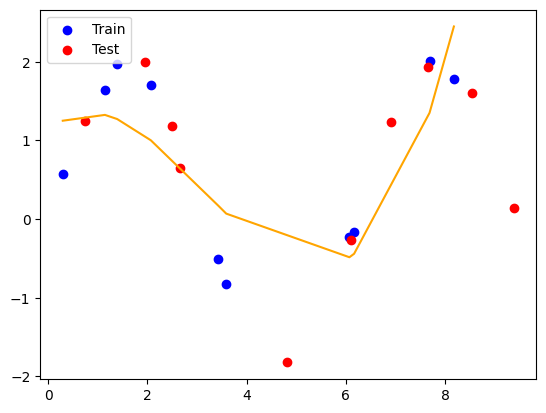

In [133]:
# Create your plot here of the training data, test data, and graph of g(x).
x_test = test_data[:, 0]
y_test = test_data[:, 1]

plt.scatter(x, y, color='blue', label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')
plt.plot(x_sorted, y_hat_sorted, color='orange')
plt.legend()
plt.show()

Now, using the polynomial $g(x)$ make predictions of the $y$-values for each of the $x$-values in the new test data set.  Compare the values of these predictions to the actual $y$-values.  Are they close?

Compute the sum-of-squares error for the test dataset, similar to how you computed it for the training data set above.

In [134]:
# Use the polynomial g(x) to make predictions for the y-values of each of the corresponding x-values in the test_data array.
y_pred = g(x_test, c)

# Then compare these predictions to the actual y-values, and compute the sum-of-square error.
print(f"Sum of squares error for g(x): {sse(y_test, y_pred):.2f}")

Sum of squares error for g(x): 48.18


Now, repeat the above proceedure, but this time using polynomials of higher degree.  

More precisely, for each of the degrees $1 \leq m \leq 20$ find the degree $m$ polynomial

\begin{align}
f(x,\mathbf{c}) = c_0 + c_1 x+ c_2 x^2 + \cdots + c_m x^m
\end{align}

that minimizes the least-squares error on the training data.  Compute the sum-of-squares training error for each of the polynomials, as well as the sum-of-squares test error.  Do you expect that polynomials of higher degree will do a better job at approximating our dataset, or worse?

**Hint:** Don't go through and set up each equation separately.  Write a function of some sort that will set up and solve the normal equations for polynomials of a given degree, and return both the training and testing error.  Then set up a loop to evaluate your function for the required degrees.

In [135]:
# For polynomials of degree 1 <= m <= 20, set up and solve the normal equations, and compute the training and testing error here.
results = []
for deg in range(1, 21):
    # Get the design matrix and coefficients
    X_i = design_matrix(x, deg)
    c_i = solve(X_i, y)

    # Predict y_hat and y_pred
    y_hat_i = g(x, c_i)
    y_pred_i = g(x_test, c_i)

    # Compute errors
    sse_train_i = sse(y, y_hat_i)
    sse_test_i = sse(y_test, y_pred_i)

    # Append results
    for i, c_i_j in enumerate(c_i):
        results.append({
            'degree': deg,
            'sse_train': sse_train_i,
            'sse_test': sse_test_i,
            'i': i,
            'c': c_i_j
        })

df = (
    pl.DataFrame(results)
    # Pivot out coefficients
    .pivot(on='i', index=['degree', 'sse_train', 'sse_test'])
    # Rename coefficient columns
    .rename({str(i): f"c_{i}" for i in range(21)})
)

df

degree,sse_train,sse_test,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,11.699601,12.325153,0.826025,-0.007727,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,6.2529,17.303071,2.343501,-1.187445,0.137437,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3,3.820634,48.175459,1.112114,0.578666,-0.391951,0.041717,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
4,0.250947,3.621714,-0.781301,5.00344,-2.804835,0.489173,-0.02643,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5,0.134572,39.046861,-0.447227,3.752043,-1.659266,0.095223,0.029562,-0.002784,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
16,2801.291973,4.2904e10,173.545715,-826.510498,1706.141113,-1753.084717,986.883789,-309.379089,48.882423,-1.641114,-0.618211,0.097405,-0.007549,0.000415,0.000014,-0.000003,-3.7638e-8,-1.5887e-8,2.3586e-9,null,null,null,null
17,7456.417375,4.9781e10,32.389511,176.815186,-402.549927,387.480713,-192.410278,47.813293,-4.469242,-0.099444,-0.028244,0.010851,0.001356,-0.000326,-0.000004,0.000004,-7.7599e-7,9.1915e-8,-1.8577e-9,-2.0038e-10,null,null,null
18,4389.226182,4.3150e13,161.447876,-571.389587,821.532227,-365.317749,-164.808533,214.089127,-75.288498,10.568627,-0.602408,0.0951,-0.005771,-0.002739,-0.000132,0.000073,7.4693e-7,3.1143e-7,-1.2903e-7,-3.2839e-9,9.1895e-10,null,null


Now, on the same graph plot the training and testing errors as a function of the degree of the polynomials.

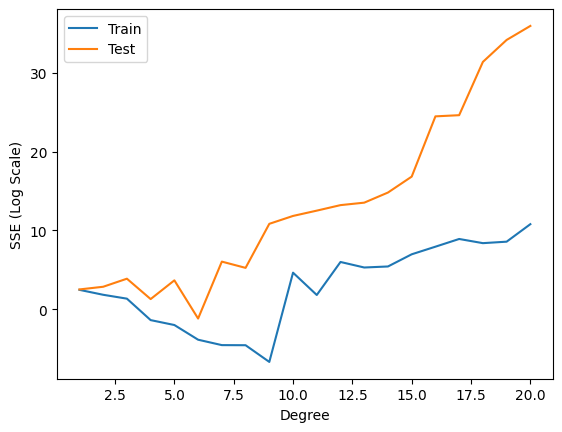

In [136]:
# Create your plot of the training and testing error as a function of the polynomial degree here.
plt.plot(df['degree'], df['sse_train'].log(), label='Train')
plt.plot(df['degree'], df['sse_test'].log(), label='Test')
plt.ylabel('SSE (Log Scale)')
plt.xlabel('Degree')
plt.legend()
plt.show()

What do you observe about the training and testing error as the degree of the polynomial increases?  Can you explain what happens?  



---



**We find that initially, the training error of our model decreases, but then subsequently increases. The testing error of our model increases steadily as the degrees of our model increases. This is due to our model overfitting on the training data.**




---



To understand what is happening, compare the coefficient vectors $\mathbf{c} = (c_0, c_1, \ldots, c_m)$ for different values of $m$.  (For example,  you might do a scatter plot of the coefficients.)  What do you notice about the relative sizes of the coefficients for various values of $m$?

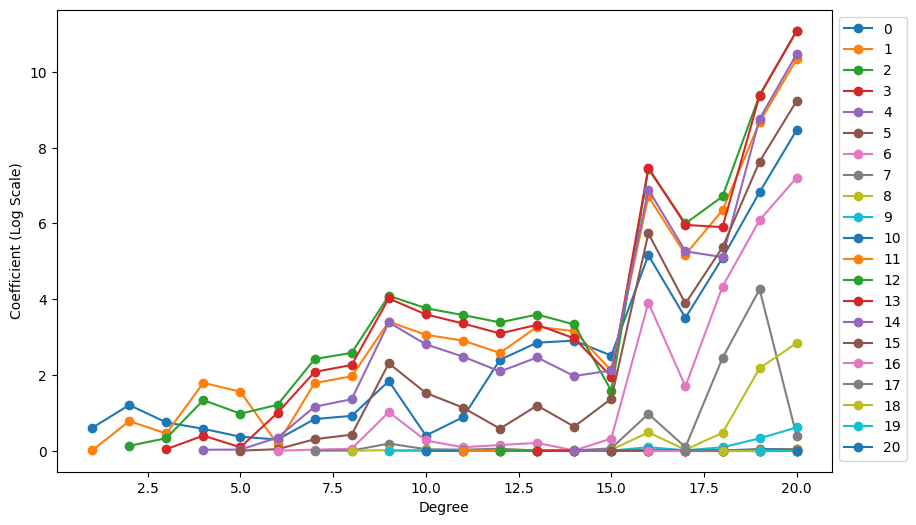

In [137]:
# Compare the coefficient vectors for various degrees m here (e.g. make a scatterplot, or print out the values and compare directly).
plt.figure(figsize=(10, 6))
for i in range(21): 
    plt.plot(df['degree'], df[f'c_{i}'].abs().log1p(), label=i, marker='o')

plt.ylabel("Coefficient (Log Scale)")
plt.xlabel('Degree')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

One way of controlling against overfitting is to limit the model complexity (in our case, this means limiting the degree of the polynomial).  By working with a less flexible (i.e. lower degree) polynomial, the model won't be allowed to become fine-tuned to the noise in our dataset, and ideally will only be able to become attuned to the features that we care about in the data.  

By looking at your comparison of the training/testing error above, which choice of degree looks as though it will give the best model for making predictions on new data points?



---



**From the SSE vs. Degree plot above it appears that both training and testing error are minimized with a degree of about 6.**




---

Another way of protecting against overfitting is by introducing some form of *regularization* to our model.  This involves introducing a separate term into our error function which forces the coefficients in $\mathbf{c}$ to not grow too large.

More precisely, instead of finding a vector $\mathbf{c}$ which minimizes the sum-of-squares error function

\begin{align}
\| \mathbf{y} - X\mathbf{c}\|^2 = \sum_{i=1}^m(y_i-f(x_i,\mathbf{c}))^2,
\end{align}

we instead try to minimize

\begin{align}
\| \mathbf{y} - X\mathbf{c}\|^2 + \lambda \|\mathbf{c}\|^2= \sum_{i=1}^m(y_i-f(x_i,\mathbf{c}))^2 + \lambda\sum_{i=1}^m c_i^2,
\end{align}

where $\lambda$ is a parameter that governs how much much weight is given to minimizing the coefficients in $\mathbf{c}$.  If $\lambda$ is large, then minimizing $\| \mathbf{y} - X\mathbf{c}\|^2 + \lambda \|\mathbf{c}\|^2$ will lead to small coefficients in $\mathbf{c}$, while if $\lambda$ is small then the coefficients in $\mathbf{c}$ may be larger.  Taking $\lambda = 0$ returns us to the situation we considered above, without any regularization.

Although we won't prove it here, the regularized loss function can be minimized by solving the *regularized normal equations*:

\begin{align}
(X^TX+\lambda I)\mathbf{c} = X^T\mathbf{y}
\end{align}

where $I$ is the identity matrix of the appropriate size.  (The above formula can be derived by computing the gradient of the regularized loss function with respect to the components of $\mathbf{c}$, setting it equal to zero, and solving.)



---



Now, we'll repeat the above steps, this time solving the regularized normal equations.  

Using polynomials of degree 20 only (i.e. $m=20$), pick five different values of $\lambda$ between 0 and 1, and solve the corresponding regularized normal equations.  Then plot the different coefficient values you get.  What do you notice about the coefficients you find for larger values of $\lambda$?

In [138]:
# Solve your regularized normal equations here for five different values of lambda, then plot the coefficients you find.
def solve_reg(X: np.array, y: np.array, lambda_: float) -> np.array:
    return np.linalg.inv(X.T @ X + lambda_ * np.eye(X.shape[1])) @ (X.T @ y)

lambdas = np.linspace(0, 1, 5)
X_20 = design_matrix(x, 20)

results = []
for lambda_ in lambdas:
    c_i = solve_reg(X_20, y, lambda_)
    
    for j in range(21):
        results.append(
            {
                'lambda': lambda_,
                'c': c_i[j],
                'j': j
            }
        )

df = (
    pl.DataFrame(results)
    # Pivot out j
    .pivot(on='j', index='lambda', values='c')
    # Rename coefficient columns
    .rename({str(i): f"c_{i}" for i in range(21)})
)

df

lambda,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,-4755.740082,30860.804199,-64906.080811,65479.996338,-35411.529175,10265.507874,-1355.280279,0.46838,16.155964,-0.850798,-0.045568,0.036119,-0.008951,0.000499,0.000001,-0.000001,0.000001,-1.9880e-8,-1.7701e-8,-1.1483e-10,1.0652e-10
0.25,-107.525425,56.016388,-9.290629,0.543668,0.295342,0.076516,-0.114854,-0.176161,0.138758,-0.029627,0.001118,0.000071,0.000032,3.1069e-7,-3.3437e-7,-7.4410e-8,-4.5885e-9,1.3362e-9,5.0048e-11,7.7550e-12,-1.5289e-12
0.5,-163.113568,74.822549,-10.318206,-0.584429,0.725258,0.000419,-0.091821,-0.189731,0.143361,-0.030688,0.001368,0.000033,0.000031,0.000001,-3.7987e-7,-7.1701e-8,-5.4051e-9,1.1989e-9,7.5779e-11,8.2936e-12,-1.6628e-12
0.75,-6.122094,-4.703981,7.531845,-2.362341,0.636962,0.02952,-0.098206,-0.170793,0.136754,-0.032748,0.002764,-0.000147,0.000014,0.000006,-6.5028e-7,-4.2411e-8,-7.4968e-9,2.3808e-10,1.9171e-10,9.3854e-12,-2.0399e-12
1.0,74.882428,-41.589649,10.50975,-1.53182,0.479124,0.022434,-0.108732,-0.138202,0.12088,-0.031425,0.003476,-0.000278,0.000005,0.000009,-7.8049e-7,-2.2330e-8,-9.0953e-9,-4.0665e-10,2.6865e-10,9.6924e-12,-2.2431e-12


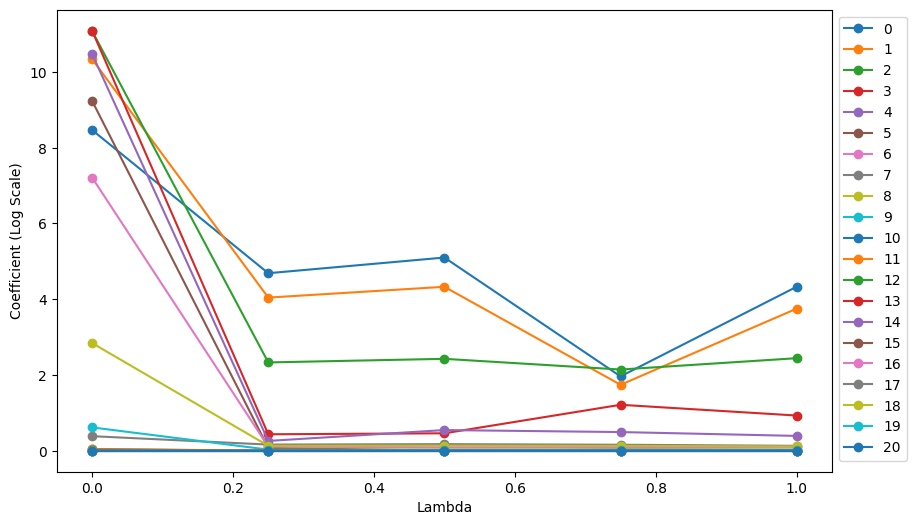

In [139]:
plt.figure(figsize=(10, 6))
for i in range(21): 
    plt.plot(df['lambda'], df[f'c_{i}'].abs().log1p(), label=i, marker='o')

plt.ylabel("Coefficient (Log Scale)")
plt.xlabel('Lambda')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Finally, for the five different values of $\lambda$ you selected, compute and compare the training and testing sum-of-squares errors.   

In [140]:
# Compute and compare the training and testing sum-of-squares errors for the different values of lambda you chose.
results = []
for lambda_ in lambdas:
    # Get the design matrix and coefficients
    X_i = design_matrix(x, 20)
    c_i = solve_reg(X_i, y, lambda_)

    # Predict y_hat and y_pred
    y_hat_i = g(x, c_i)
    y_pred_i = g(x_test, c_i)

    # Compute errors
    sse_train_i = sse(y, y_hat_i)
    sse_test_i = sse(y_test, y_pred_i)

    # Append results
    results.append({
        'lambda': lambda_,
        'sse_train': sse_train_i,
        'sse_test': sse_test_i,
    })

df = pl.DataFrame(results)

df

lambda,sse_train,sse_test
f64,f64,f64
0.0,48873.148643,4.1554e15
0.25,14976.032694,1.9422e12
0.5,39502.710274,2.1108e12
0.75,131.610029,2.3493e12
1.0,6915.454762,2.3907e12


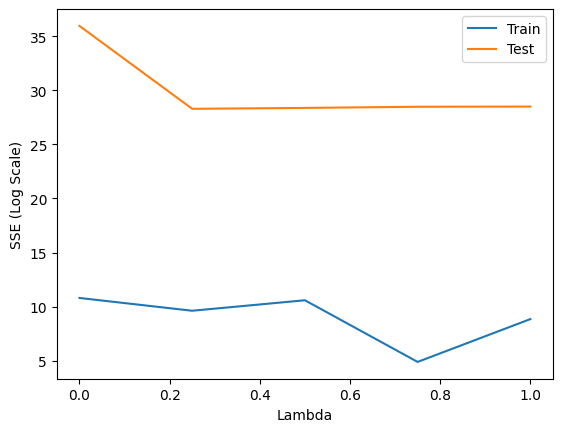

In [141]:
plt.plot(df['lambda'], df['sse_train'].log(), label='Train')
plt.plot(df['lambda'], df['sse_test'].log(), label='Test')
plt.xlabel('Lambda')
plt.ylabel('SSE (Log Scale)')
plt.legend()
plt.show()


Which value of $\lambda$ seems to give the best approximation?

---



**The SSE for training and testing is fairly similar for the different values of lambda, but is the lowest for both training and testing at around .75.**




---